<a href="https://colab.research.google.com/github/KhayalM/Extended-Finite-Element-Methods-Second-Part/blob/main/Mesh_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

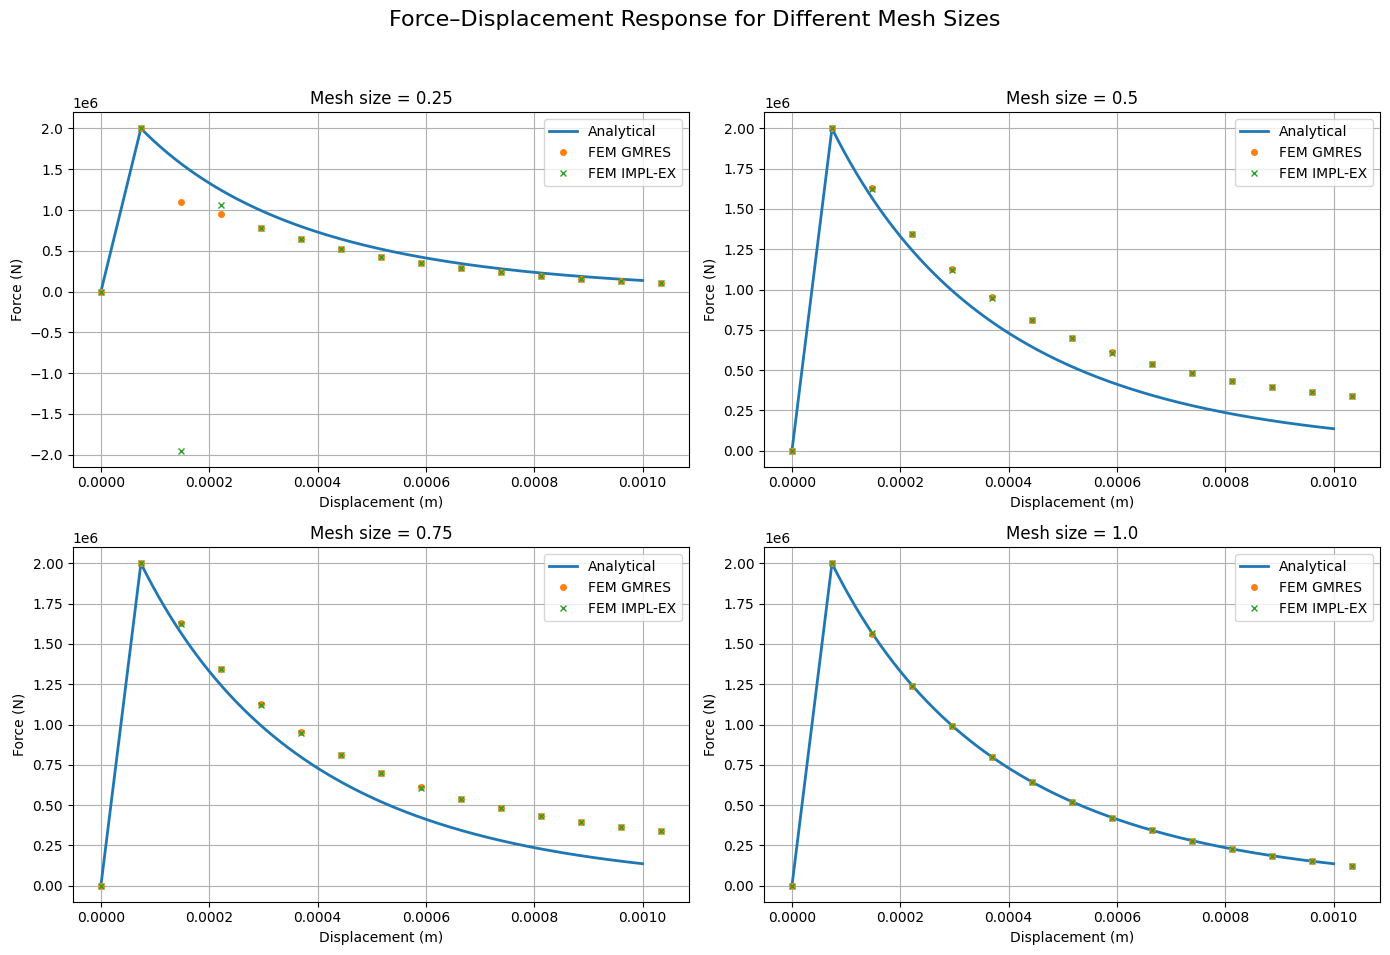

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------
# Excel files and corresponding mesh sizes
# ----------------------------------
files = {
    0.25: "force_displacement_results_0.25.xlsx",
    0.5:  "force_displacement_results_0.5.xlsx",
    0.75: "force_displacement_results_0.75.xlsx",
    1.0:  "force_displacement_results_1.0.xlsx"
}

# ----------------------------------
# Create 2x2 subplot layout
# ----------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# ----------------------------------
# Loop over files and subplots
# ----------------------------------
for ax, (mesh_size, filename) in zip(axes, files.items()):

    # Read Excel sheets
    df_analytical = pd.read_excel(filename, sheet_name="Analytical")
    df_gmres = pd.read_excel(filename, sheet_name="FEM_GMRES")

    # Plot Analytical
    ax.plot(
        df_analytical["Displacement_u"],
        df_analytical["Force"],
        label="Analytical",
        linewidth=2
    )

    # Plot FEM GMRES
    ax.plot(
        df_gmres["Displacement_u"],
        df_gmres["Force"],
        'o',
        markersize=4,
        label="FEM GMRES"
    )

    # Plot FEM IMPL-EX if it exists
    try:
        df_implex = pd.read_excel(filename, sheet_name="FEM_IMPLEX")
        ax.plot(
            df_implex["Displacement_u"],
            df_implex["Force"],
            'x',
            markersize=4,
            label="FEM IMPL-EX"
        )
    except ValueError:
        pass  # Sheet does not exist

    # Formatting
    ax.set_title(f"Mesh size = {mesh_size}")
    ax.set_xlabel("Displacement (m)")
    ax.set_ylabel("Force (N)")
    ax.grid(True)
    ax.legend()

# ----------------------------------
# Global layout adjustments
# ----------------------------------
plt.suptitle("Force–Displacement Response for Different Mesh Sizes", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

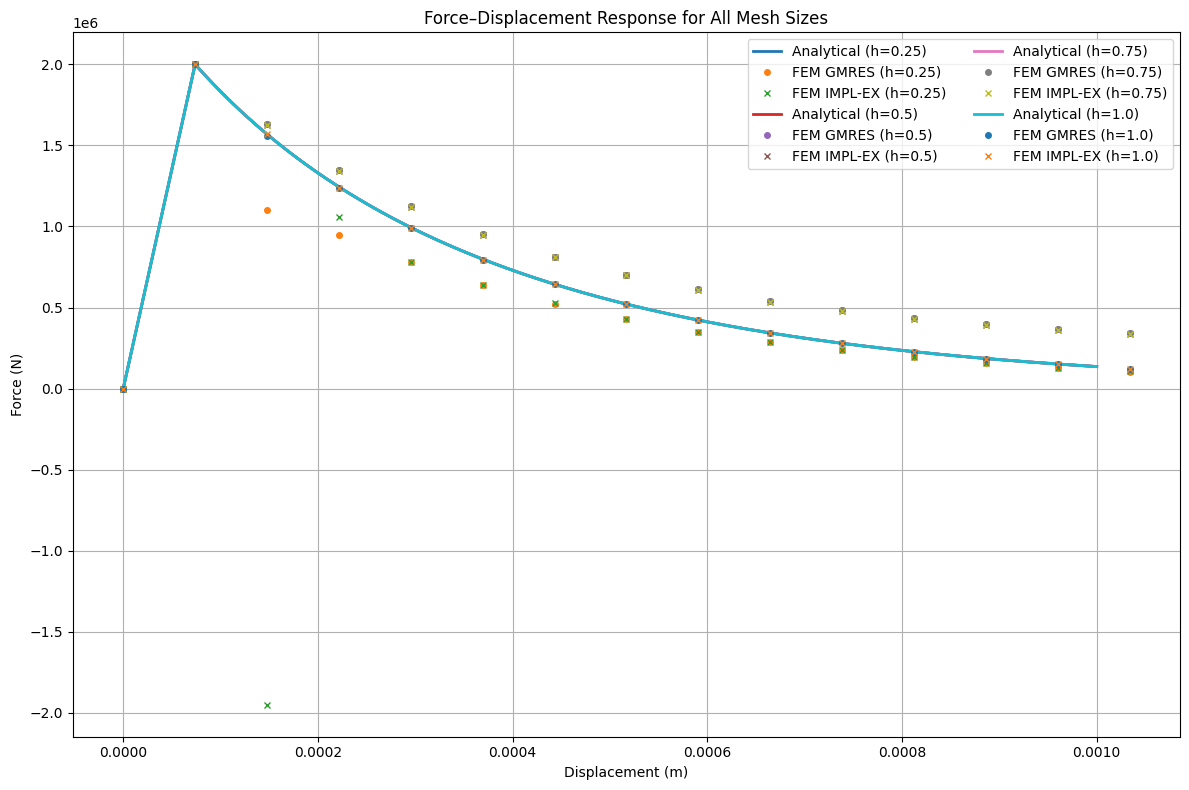

In [2]:
plt.figure(figsize=(12, 8))

# ----------------------------------
# Loop over mesh sizes
# ----------------------------------
for mesh_size, filename in files.items():

    # Load data
    df_analytical = pd.read_excel(filename, sheet_name="Analytical")
    df_gmres = pd.read_excel(filename, sheet_name="FEM_GMRES")

    # Analytical (solid line)
    plt.plot(
        df_analytical["Displacement_u"],
        df_analytical["Force"],
        linewidth=2,
        label=f"Analytical (h={mesh_size})"
    )

    # FEM GMRES (markers)
    plt.plot(
        df_gmres["Displacement_u"],
        df_gmres["Force"],
        'o',
        markersize=4,
        label=f"FEM GMRES (h={mesh_size})"
    )

    # FEM IMPL-EX (if available)
    try:
        df_implex = pd.read_excel(filename, sheet_name="FEM_IMPLEX")
        plt.plot(
            df_implex["Displacement_u"],
            df_implex["Force"],
            'x',
            markersize=4,
            label=f"FEM IMPL-EX (h={mesh_size})"
        )
    except ValueError:
        pass

# ----------------------------------
# Plot formatting
# ----------------------------------
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")
plt.title("Force–Displacement Response for All Mesh Sizes")
plt.grid(True)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()